In [49]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load user feature data
df = pd.read_csv("/Users/aryamane/Downloads/user_features_.csv")
user_ids = df['user_id']
X = df.drop(columns=['user_id'])
print(X.head())


   num_ratings  avg_rating  std_rating  avg_days_between_ratings  days_active  \
0           18    3.944444    0.937595                 18.058824          316   
1           17    3.176471    1.185079                 19.187500          313   
2            4    4.000000    0.000000                 19.666667           60   
3           19    4.315789    0.885226                 19.500000          360   
4           17    3.882353    1.111438                 20.125000          329   

   signup_year  
0         2024  
1         2021  
2         2025  
3         2023  
4         2021  


In [51]:
# Standardize for better clustering performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


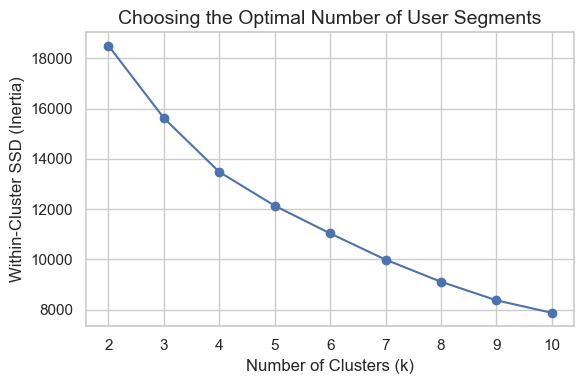

In [53]:
inertia = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    
#plot
plt.figure(figsize=(6,4))
plt.plot(k_range, inertia, marker='o', linestyle='-')

plt.title("Choosing the Optimal Number of User Segments", fontsize=14)
plt.xlabel("Number of Clusters (k)", fontsize=12)
plt.ylabel("Within-Cluster SSD (Inertia)", fontsize=12)

plt.grid(True)
plt.xticks(k_range)
plt.tight_layout()
plt.show()

In [54]:
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(X_scaled)


In [55]:
df['user_id'] = user_ids
df.to_csv("/Users/aryamane/Downloads/clustered_users.csv", index=False)
print("Cluster labels added and saved to clustered_users.csv")

Cluster labels added and saved to clustered_users.csv


In [65]:
#Summarize User Behavior Per Cluster

import pandas as pd

# Load clustered user features
df = pd.read_csv("/Users/aryamane/Downloads/clustered_users.csv")

# Group by cluster and summarize their behavior
summary = df.groupby('cluster').agg({
    'num_ratings': 'mean',
    'avg_rating': 'mean',
    'std_rating': 'mean',
    'avg_days_between_ratings': 'mean',
    'days_active': 'mean',
    'signup_year': 'median'
}).round(2)

summary.index.name = "Cluster"
summary.reset_index(inplace=True)

In [67]:
df['cluster_label'] = df['cluster'].map({
    0: "Moderate Loyal Users",
    1: "Power Users",
    2: "Inconsistent Raters",
    3: "Engaged Newcomers",
    4: "Positive One-Timers"
})
df.to_csv("/Users/aryamane/Downloads/labeled_clutering_users.csv", index=False)
print("Saved labeled_clutering_users.csv")

Saved labeled_clutering_users.csv


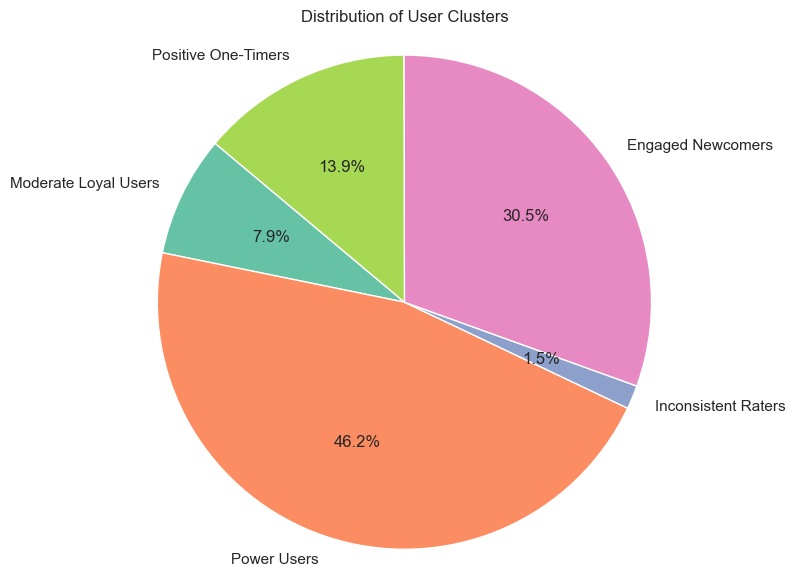

In [69]:
#visualize the labeled clusters 
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("/Users/aryamane/Downloads/labeled_clutering_users.csv")

cluster_counts = df['cluster'].value_counts().sort_index()
cluster_labels = {
    0: "Moderate Loyal Users",
    1: "Power Users",
    2: "Inconsistent Raters",
    3: "Engaged Newcomers",
    4: "Positive One-Timers"
}

label_names = [cluster_labels[c] for c in cluster_counts.index]

# Create a simple pie chart
plt.figure(figsize=(8, 6))
plt.pie(cluster_counts, labels=label_names, autopct='%1.1f%%', startangle=140, colors=plt.cm.Set2.colors)
plt.title("Distribution of User Clusters")
plt.axis('equal') 
plt.tight_layout()
plt.show()
